In [141]:
# Data tools
import numpy as np
import pandas as pd

# Viz tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("PuBuGn_d")

In [142]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [143]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [144]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,6981-TDRFT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [146]:
df[df.duplicated('customerID')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [147]:
df.drop(columns='customerID',inplace=True)

## Explore each feature

**The target variable: churn**

In [148]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [149]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

*We may have to deal with imbalanced data*

**SeniorCitizen**

*SeniorCitizen seems a boolean, but was imported as an int.*

In [150]:
df.SeniorCitizen = df.SeniorCitizen.apply(str)

In [151]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

*Most users are not senior citizen*

In [152]:
df.SeniorCitizen = df.SeniorCitizen.apply(int)

**Partner**

In [153]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

**Dependents**

In [154]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

**Tenure**

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


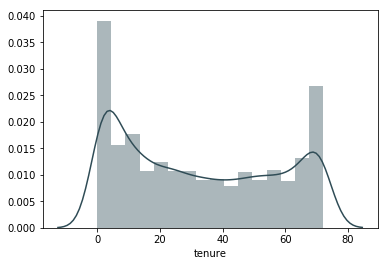

In [155]:
sns.distplot(df.tenure)

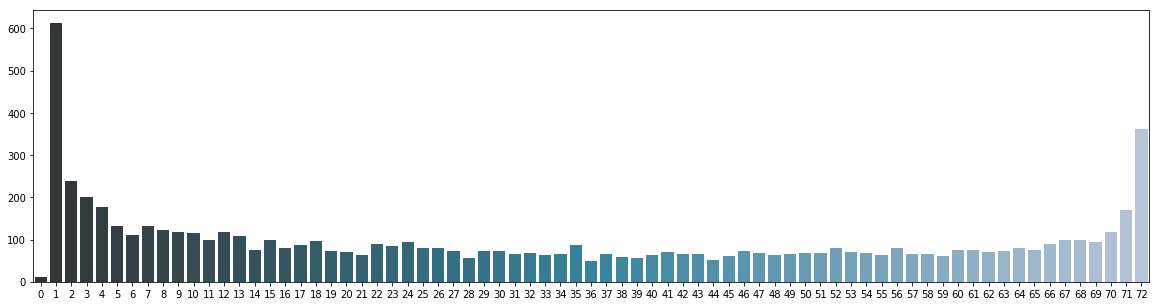

In [156]:
f, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=df.tenure.value_counts().index,y=df.tenure.value_counts().values,ax=ax,palette="PuBuGn_d")

**Phone service**

In [157]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

*Most people have a phone service*

**Multiple lines**

In [158]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

*No phone service is like 'No'*

**Internet service**

In [159]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

*We can make dummy variables and a boolean feature*

**Online security**

In [160]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

**Online backup**

In [161]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

**Device protection**

In [162]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

**Tech support**

In [163]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

**Streaming TV**

In [164]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

**Streaming movies**

In [165]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

**Contract**

In [166]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

**Paperless billing**

In [167]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

**Payment method**

In [168]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

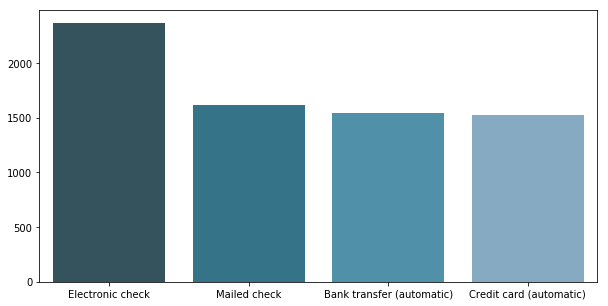

In [169]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=df.PaymentMethod.value_counts().index,y=df.PaymentMethod.value_counts().values,ax=ax,palette="PuBuGn_d")

*Opportunity to make some feature engineering, checking if payment method is automatic or not.*

**Monthly charges**

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


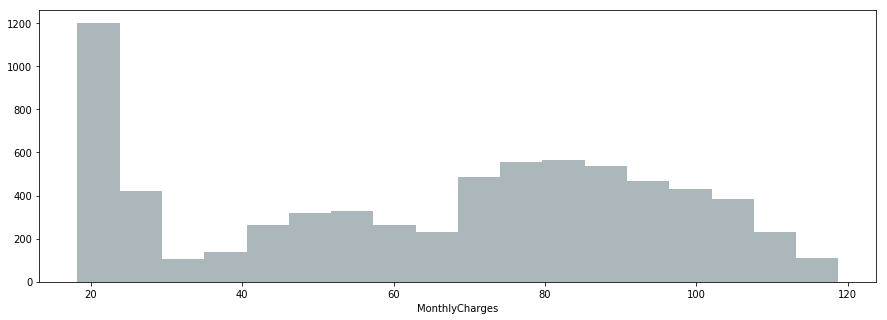

In [170]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df.MonthlyCharges,kde=False,ax=ax)

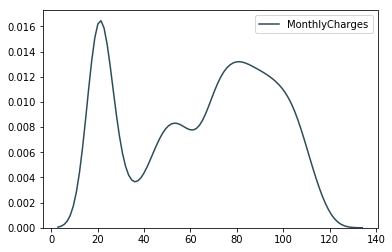

In [171]:
sns.kdeplot(df.MonthlyCharges)

*Most monthly charges are around 20 and 80 dollars.*

**Total charges**

In [172]:
df.TotalCharges = np.where(df.TotalCharges == ' ', df.MonthlyCharges, df.TotalCharges)

In [173]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


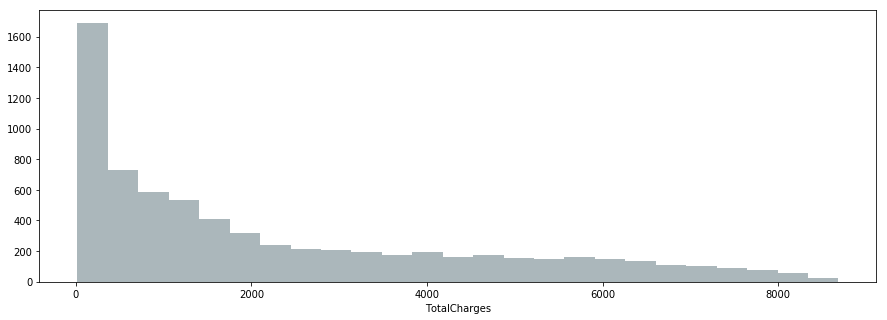

In [174]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df.TotalCharges,kde=False,ax=ax)

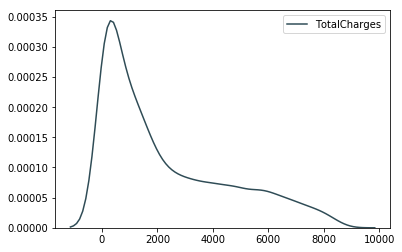

In [175]:
sns.kdeplot(df.TotalCharges)

*Considering that most users have a tenure of 1 month and that most monthly charges are around 20 dollars, it makes sense for the Total Charges to peak around 20 dollars.*

## Correlations

In [176]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


In [177]:
df.drop(['TotalCharges'],axis=1,inplace=True)

## Transformations

### Booleans

In [178]:
df.Churn = np.where(df.Churn == 'Yes',1,0)
df.Partner = np.where(df.Partner == 'Yes',1,0)
df.Dependents = np.where(df.Dependents == 'Yes',1,0)
df.PhoneService = np.where(df.PhoneService == 'Yes',1,0)
df.MultipleLines = np.where(df.MultipleLines == 'Yes',1,0)
df.OnlineSecurity = np.where(df.OnlineSecurity == 'Yes',1,0)
df.OnlineBackup = np.where(df.OnlineBackup == 'Yes',1,0)
df.DeviceProtection = np.where(df.DeviceProtection == 'Yes',1,0)
df.TechSupport = np.where(df.TechSupport == 'Yes',1,0)
df.StreamingTV = np.where(df.StreamingTV == 'Yes',1,0)
df.StreamingMovies = np.where(df.StreamingMovies == 'Yes',1,0)
df.PaperlessBilling = np.where(df.PaperlessBilling == 'Yes',1,0)

### Feature engineering

In [179]:
df['HasInternetService'] = np.where(df.InternetService == 'No', 0,1)

In [180]:
df['AutomaticPayment'] = np.where(df.PaymentMethod.str.contains('automatic'),1,0)

### Dummies

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
gender                7043 non-null object
SeniorCitizen         7043 non-null int64
Partner               7043 non-null int64
Dependents            7043 non-null int64
tenure                7043 non-null int64
PhoneService          7043 non-null int64
MultipleLines         7043 non-null int64
InternetService       7043 non-null object
OnlineSecurity        7043 non-null int64
OnlineBackup          7043 non-null int64
DeviceProtection      7043 non-null int64
TechSupport           7043 non-null int64
StreamingTV           7043 non-null int64
StreamingMovies       7043 non-null int64
Contract              7043 non-null object
PaperlessBilling      7043 non-null int64
PaymentMethod         7043 non-null object
MonthlyCharges        7043 non-null float64
Churn                 7043 non-null int64
HasInternetService    7043 non-null int64
AutomaticPayment      7043 non-null int64
dtype

In [182]:
df = pd.get_dummies(df)

In [183]:
df.head().T

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.0,0.0
Partner,1.00,0.00,0.00,0.0,0.0
Dependents,0.00,0.00,0.00,0.0,0.0
tenure,1.00,34.00,2.00,45.0,2.0
PhoneService,0.00,1.00,1.00,0.0,1.0
MultipleLines,0.00,0.00,0.00,0.0,0.0
OnlineSecurity,0.00,1.00,1.00,1.0,0.0
OnlineBackup,1.00,0.00,1.00,0.0,0.0
DeviceProtection,0.00,1.00,0.00,1.0,0.0
TechSupport,0.00,0.00,0.00,1.0,0.0


In [184]:
df.to_pickle('data/interim/churn data.pickle')